In [1]:
# for data manipulation and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
# load the datased

df = pd.read_csv(r"D:\ML\Machine Learning_Practical\Data\Advertising.csv")

In [3]:
# top 5 rows of dataset
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
print(f"Columns in dataset:\n{df.columns}")

Columns in dataset:
Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')


Dataset stores following **information**:
1. Expenditure on **`TV Advertisements`** (_Thousand \$_)
2. Expenditure on **`Radio Advertisements`** (_Thousand \$_)
3. Expenditure on **`Newspaper Advertisements`** (_Thousand \$_)
4. Total **`Sales`** (_Thousand \$_)

# Data Pre-processing

In [5]:
# input features

# all columns except "sales" will be inputs
# drop col named "sales" along columns (axis=1)
X = df.drop("sales", axis=1)

# target values

# "sales" column will be target variable
y = df["sales"]

## Feature Engineering- Generating Polynomial Features

In [6]:
# for generating polynomial fearures

from sklearn.preprocessing import PolynomialFeatures

In [8]:
# create instance of PolynomicalFeatures class
# degree=3 polynomial (previous evaluation found this adequate)
# interaction_only=False -> Keeps degree 3 terms which are squares of single input features
# hence will retain both feature1 * feature2 (interaction terms) term
# aswell as feature1**2 (square terms) term (and so on)

poly_generator = PolynomialFeatures(degree=3, interaction_only=False,
                                   include_bias=False)

In [10]:
# fit polynomial features to dataset & transform (generating polynomial features)

poly_features = poly_generator.fit_transform(X)

In [12]:
print(f"Shape of Original dataset = {X.shape}\nShape of dataset after feature engineering = {poly_features.shape}")

Shape of Original dataset = (200, 3)
Shape of dataset after feature engineering = (200, 19)


## Training set & Test set

Preparing the dataset with polynomial features for training and testing.

In [13]:
# for splitting (shuffle split) dataset into training & test set
from sklearn.model_selection import train_test_split

In [14]:
# Training set = 70% data; Test set = 30% data
# NOTE: random_state=0 (same as in Linear Regression model training) will allow comparing performance
X_train, X_test, y_train, y_test = train_test_split(poly_features, y,
                                                    test_size=0.3,
                                                    random_state=0)

In [15]:
print(f"Shape of Training set = {X_train.shape}\nSHape of Test set = {X_test.shape}")

Shape of Training set = (140, 19)
SHape of Test set = (60, 19)


## Scaling the data

In [17]:
# tool for feature scaling

from sklearn.preprocessing import StandardScaler

In [18]:
# create scaling object

scaler = StandardScaler()

### NOTE- Fitting the Training set only
>ML model **should NOT have any prior knowledge** of the Test set.\
Otherwise it may lead to _**data leakage**_ and defeat the purpose of having a separate set of data for testing the model's performance.\
**Test set** should be "_pristine_" - contain **previously unseen data**.

In [19]:
# fit Training set to learn its mean & standard deviation

scaler.fit(X_train)

StandardScaler()

In [20]:
# use the info. learnt from Training set to transform (scale)
# BOTH the Training set & Test set

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# compare unscaled & scaled dataset

print(f"First example of Unscaled dataset:\n\n{poly_features[0]}")
print(f"\nFirst example of Scaled dataset:\n\n{X_train_scaled[0]}")

First example of Unscaled dataset:

[2.30100000e+02 3.78000000e+01 6.92000000e+01 5.29460100e+04
 8.69778000e+03 1.59229200e+04 1.42884000e+03 2.61576000e+03
 4.78864000e+03 1.21828769e+07 2.00135918e+06 3.66386389e+06
 3.28776084e+05 6.01886376e+05 1.10186606e+06 5.40101520e+04
 9.88757280e+04 1.81010592e+05 3.31373888e+05]

First example of Scaled dataset:

[ 1.32803962 -1.33989652  0.65846895  1.56382898 -0.84570478  1.35097672
 -1.02908386 -0.7550139   0.34686732  1.68225046 -0.61505213  1.58817357
 -0.79530882 -0.51164709  0.70967286 -0.84628773 -0.72733341 -0.5473259
  0.0788874 ]


# Relurarization- L2 Regularisation (_Ridge Regression_)

#### NOTE
1. Sklearn calls **`λ`** (**Regularization parameter**) as **_alpha_**.
---
2. For **choosing best `λ`** using **Corss Validation (CV) set** will use a **`scorer object`** of Sklearn module
    - Scorer object works with philosophy **_higher is better_**. Hence instead of minimizing usual error formula (RMSE + Regularization) it will **<ins>maximize</ins> negative of usual error formula**.

In [30]:
# for performing L2 Regularization

from sklearn.linear_model import Ridge

In [31]:
# create a ridge object
# alpha = regularization parameter = 10

ridge_model = Ridge(alpha=10)

In [32]:
# fit ridge model to Training set

ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=10)

In [33]:
# make predictions with ridge model

test_predictions = ridge_model.predict(X_test_scaled)

### Evaluate Permofance with Regularized model (_`λ`_ = 10)

In [34]:
# for evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [35]:
# mean absolute error

mae = mean_absolute_error(y_test, test_predictions)

In [54]:
print(f"Mean Absolute Error = {np.round(mae, decimals=4)}")

Mean Absolute Error = 0.6768


In [37]:
# root mean squared error

rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

In [38]:
print(f"Root Mean Squared Error = {np.round(rmse, decimals=4)}")

Root Mean Squared Error = 1.1792


## Selecting Best `λ` using Scikit Learn

Using **K-fold Cross Validation** for selecting best **`λ`**.
>**cv** parameter in scorer object refers to CV splitting (_value of K_)\
By **default** it is **`None`**. (_if dataset is large then having a cv value slows down the process since that would require multiple iterations_)
---
>When using **Ridge CV** since K-fold CV is being performed, technically it keeps a small chunk of Training set separately as the **CV set**.
---
>Can look at available scorer metrics and choose one while creating ridge CV model object

```python
from sklearn.metrics import SCORERS

# list of all available metrics (keys) in the SCORER dict
SCORERS.keys() 
```

In [39]:
# for selecting best `λ`

from sklearn.linear_model import RidgeCV

In [44]:
# create ridge cv model
# testing `λ` = 0.1, 1.0, 10.0 (default)
# scorer metric = negative of usual error term (MAE + Regularization)
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),
                        scoring="neg_mean_absolute_error")

In [45]:
# fit ridge_cv_model only on X_train_scaled dataset
# actually this will keep a portion of X_train_scaled as the CV set
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(scoring='neg_mean_absolute_error')

In [47]:
# retrieve the alpha (`λ`) that performed best

alpha_best = ridge_cv_model.alpha_

In [49]:
print(f"Best perfroming Regularization term value (`λ`) = {alpha_best}")

Best perfroming Regularization term value (`λ`) = 0.1


## Use Ridge CV Model with Best `λ` to make Predictions

In [50]:
# test predictions with best `λ` model

test_predictions_best = ridge_cv_model.predict(X_test_scaled)

In [51]:
# evaluate performance

mae_best = mean_absolute_error(y_test, test_predictions_best)

rmse = rmse = np.sqrt(mean_squared_error(y_test, test_predictions_best))

In [53]:
print(f"Performance with `λ` = {alpha_best}\n")

print(f"Mean Absolute Error = {np.round(mae_best, decimals=4)}")
print(f"Root Mean Squared Error = {np.round(rmse, decimals=4)}")

Performance with `λ` = 0.1

Mean Absolute Error = 0.454
Root Mean Squared Error = 0.8005


In [56]:
# create dataframe with pre and post CV alphas

rows = ["λ=10", "λ=0.1"]
cols = ["MAE", "RMSE"]
data = np.array([
    [0.6768, 1.1792],
    [0.454, 0.8005]
])

df_error = pd.DataFrame(data, index=rows, columns=cols)

df_error

,MAE,RMSE
λ=10,0.6768,1.1792
λ=0.1,0.4540,0.8005


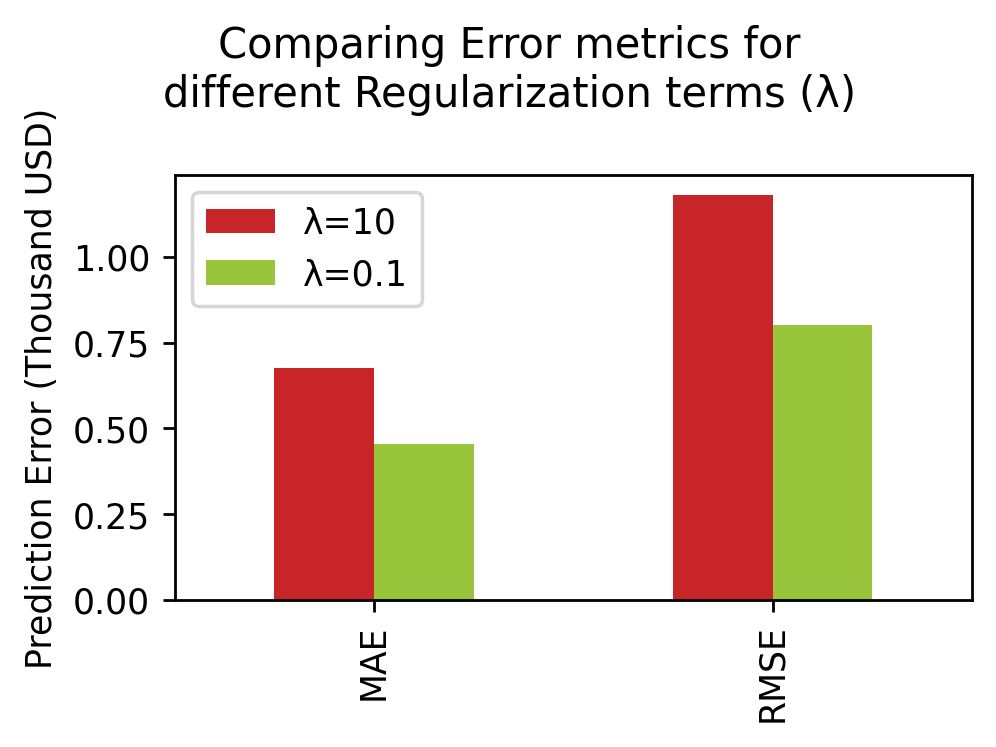

In [59]:
# visualize errors with different regularization term values

fig, ax = plt.subplots(figsize=(4,3), dpi=250)
colors = ["#C72527", "#99C53D"]

df_error.transpose().plot(kind="bar", ax=ax, color=colors)
ax.set_ylabel("Prediction Error (Thousand USD)")
fig.suptitle("Comparing Error metrics for\ndifferent Regularization terms (λ)")
fig.tight_layout();

In [60]:
# coefficients for Ridge CV model

print("Coefficients of Trained Model with Ridge CV regularization:\n",
     ridge_cv_model.coef_)

Coefficients of Trained Model with Ridge CV regularization:
 [ 5.48955031  0.37473617  0.38099195 -5.69295049  3.70585369 -0.57584019
  0.2761326  -0.33800138  0.06559943  1.9661539   0.00622609  0.05577628
 -0.33000583  0.37445126 -0.01643013  0.21365624 -0.13967071  0.07783408
  0.02489831]
